<a href="https://colab.research.google.com/github/eswar3330/USEReady_ESWAR/blob/main/USEReady_AIML_Assignment_2_Eswar_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns in the output and avoid wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the CSV file
# Make sure the file is uploaded and the name matches exactly
try:
    df = pd.read_csv('load_data.csv')
    print("CSV loaded successfully.")
except FileNotFoundError:
    print("CSV file not found. Double-check the filename and upload it if needed.")
    exit()

# Take a quick look at the first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check column types and how much data is missing
print("\nInfo about the dataset:")
df.info()

# Get basic stats for numeric columns
print("\nSummary statistics:")
print(df.describe())


CSV loaded successfully.

First 5 rows:
          Date_Time  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor          NSM   Load_Type
0  01-01-2018 00:15   8.753692                                  2.95                                   0.0        0.0                     73.210000                         100.0   900.000000  Light_Load
1  01-01-2018 00:30   4.000000                                  4.46                                   0.0        0.0                     66.770000                         100.0  1800.000000  Light_Load
2  01-01-2018 00:45   3.240000                                  3.28                                   0.0        0.0                     70.280000                         100.0  8070.880991  Light_Load
3  01-01-2018 01:00   3.310000                                  3.56                                   0.0        0.0                     68.090000 

In [2]:
# --- Phase 1: Comprehensive Data Understanding & Preprocessing ---

print("\n--- Starting Data Preprocessing ---")

# 1. Rename columns that are hard to work with due to special characters or spaces
print("\n1. Renaming columns...")
df.rename(columns={
    'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
    'CO2(tCO2)': 'CO2_tCO2'
}, inplace=True)
print("Columns renamed:", df.columns.tolist())

# 2. Convert the Date_Time column to datetime objects and make it the DataFrame index
print("\n2. Converting 'Date_Time' to datetime and setting as index...")
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%d-%m-%Y %H:%M', errors='coerce')

# Log how many datetime conversions failed
if df['Date_Time'].isnull().any():
    print(f"Warning: {df['Date_Time'].isnull().sum()} rows couldn't be parsed and were set to NaT.")

# Set datetime as index and sort the DataFrame so it's ready for time series analysis
df.set_index('Date_Time', inplace=True)
df.sort_index(inplace=True)
print("Datetime conversion complete. Data is now sorted by time.")
print("Sample after datetime processing:")
print(df.head())

# 3. Handle missing values in numerical columns
print("\n3. Handling Missing Values...")
print("Missing values before filling:")
print(df.isnull().sum())

# Forward fill missing values — common strategy for time-series to maintain continuity
numerical_cols_with_nan = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()
print(f"Forward filling these columns: {numerical_cols_with_nan}")
for col in numerical_cols_with_nan:
    df[col].fillna(method='ffill', inplace=True)

# If any NaNs still remain (e.g., at the top), apply backward fill as a fallback
print("\nMissing values after forward fill:")
print(df.isnull().sum())

for col in numerical_cols_with_nan:
    if df[col].isnull().any():
        print(f"Still missing in '{col}' after ffill — applying bfill.")
        df[col].fillna(method='bfill', inplace=True)

print("\nFinal missing values check (after ffill + bfill):")
print(df.isnull().sum())

# 4. Encode Load_Type for use in ML models
print("\n4. Encoding 'Load_Type'...")
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Load_Type_Encoded'] = le.fit_transform(df['Load_Type'])

# Display how each category was encoded
print("Encoding map for Load_Type:")
for i, label in enumerate(le.classes_):
    print(f"  {label} -> {i}")

# Final overview after preprocessing
print("\nSample rows after preprocessing:")
print(df.head())
print("\nUpdated DataFrame info:")
df.info()

print("\n--- Data Preprocessing Complete ---")



--- Starting Data Preprocessing ---

1. Renaming columns...
Columns renamed: ['Date_Time', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'Load_Type']

2. Converting 'Date_Time' to datetime and setting as index...
Datetime conversion complete. Data is now sorted by time.
Sample after datetime processing:
                     Usage_kWh  Lagging_Current_Reactive_Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2_tCO2  Lagging_Current_Power_Factor  Leading_Current_Power_Factor          NSM   Load_Type
Date_Time                                                                                                                                                                                                
2018-01-01 00:00:00   3.420000                                  3.46                                   0.0       0.0                         70.30              

/tmp/ipython-input-2-4173139279.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='ffill', inplace=True)
/tmp/ipython-input-2-4173139279.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='ffill', inplace=True)


Encoding map for Load_Type:
  Light_Load -> 0
  Maximum_Load -> 1
  Medium_Load -> 2

Sample rows after preprocessing:
                     Usage_kWh  Lagging_Current_Reactive_Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2_tCO2  Lagging_Current_Power_Factor  Leading_Current_Power_Factor          NSM   Load_Type  Load_Type_Encoded
Date_Time                                                                                                                                                                                                                   
2018-01-01 00:00:00   3.420000                                  3.46                                   0.0       0.0                         70.30                     291.49819     0.000000  Light_Load                  0
2018-01-01 00:15:00   8.753692                                  2.95                                   0.0       0.0                         73.21                     100.00000   900.000000  Light_Load                 


--- Starting Advanced EDA & Feature Engineering ---

2.1 Creating temporal features...
Temporal features added:
                     Hour  DayOfWeek  Month  Year  IsWeekend TimeOfDay
Date_Time                                                             
2018-01-01 00:00:00     0          0      1  2018          0     Night
2018-01-01 00:15:00     0          0      1  2018          0     Night
2018-01-01 00:30:00     0          0      1  2018          0     Night
2018-01-01 00:45:00     0          0      1  2018          0     Night
2018-01-01 01:00:00     1          0      1  2018          0     Night

2.2 Creating domain-specific features...
Custom features created:
                     Total_Reactive_Power_kVarh  Leading_to_Lagging_Ratio  Calculated_Power_Factor  Lagging_Current_Power_Factor_Capped  Leading_Current_Power_Factor_Capped
Date_Time                                                                                                                                             

/tmp/ipython-input-3-4179670520.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Load_Type', palette='viridis')


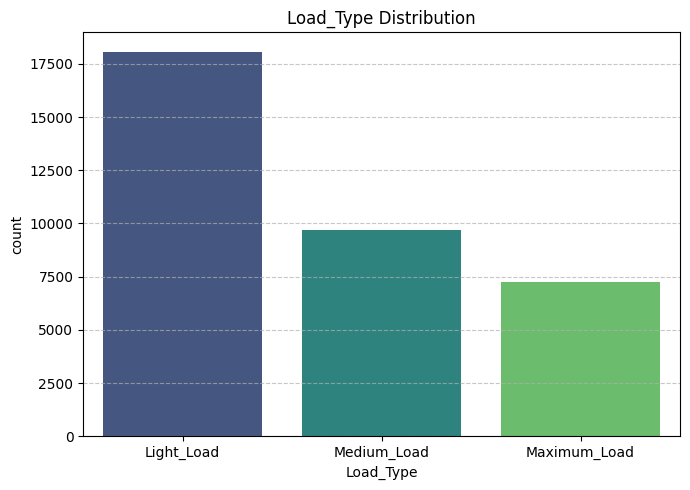

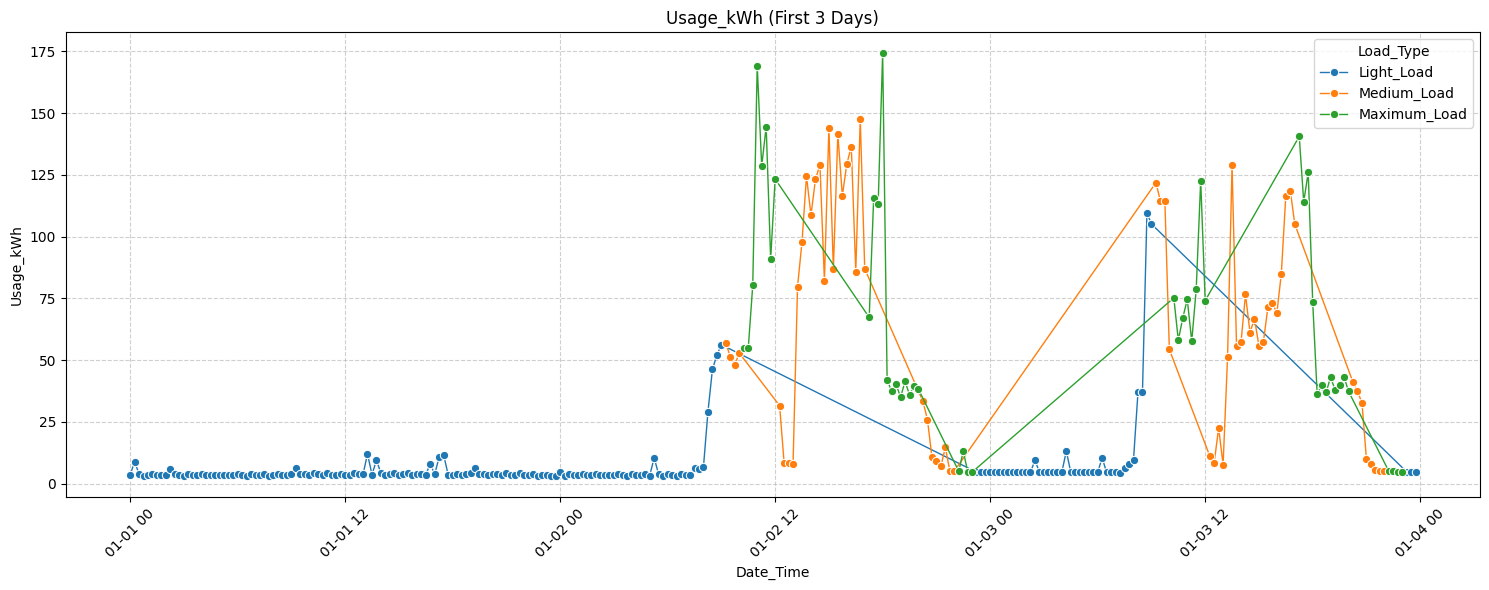


Generating correlation heatmap...


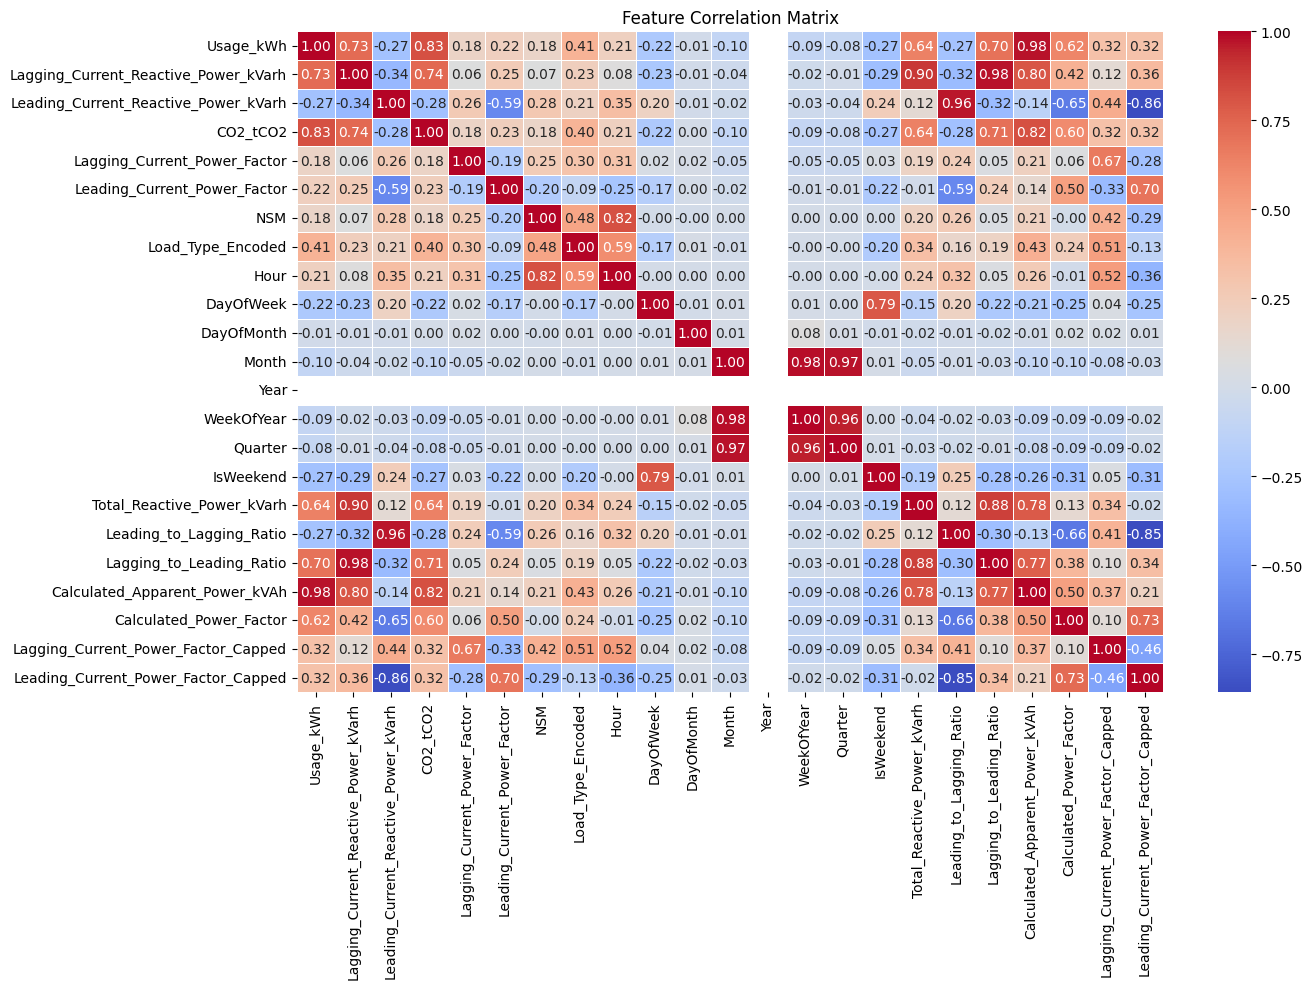


Boxplots by Load_Type...


/tmp/ipython-input-3-4179670520.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Load_Type', y=feature, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-3-4179670520.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Load_Type', y=feature, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-3-4179670520.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Load_Type', y=feature, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-3-4179670520.py:96: FutureWarning: 

Passing `palette` without assigning `hue`

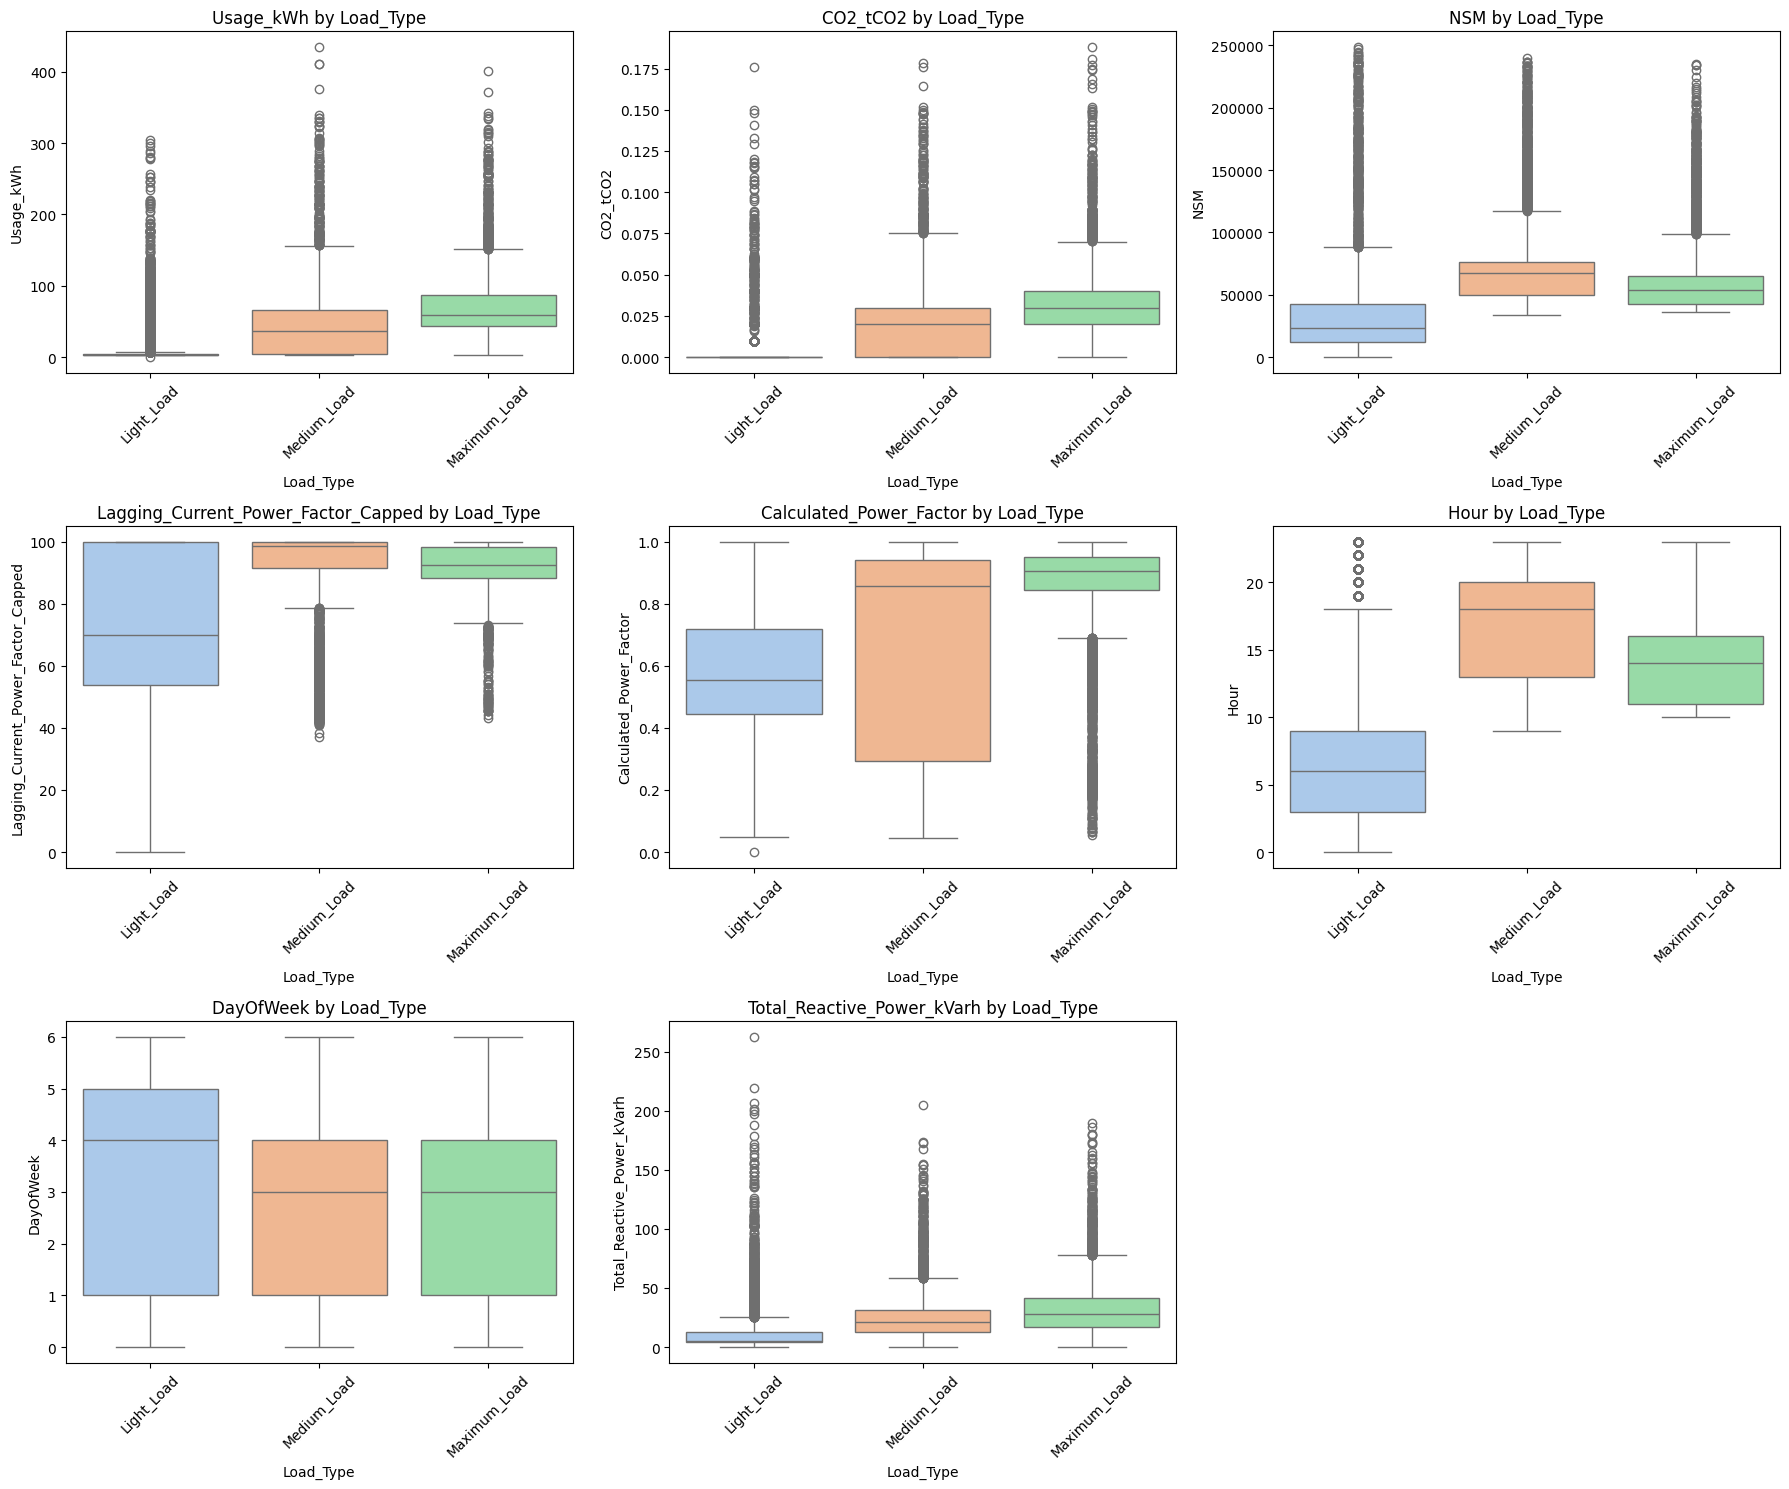


Checking NSM behavior...


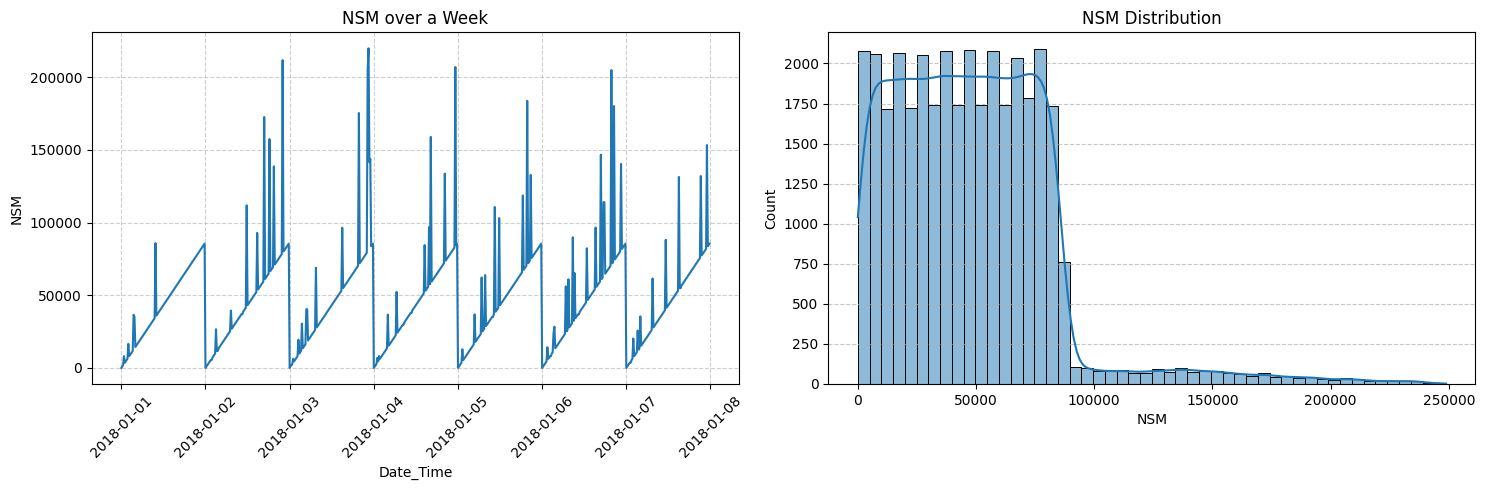

NSM check complete — if values exceed 86400 and don’t reset daily, flag them as anomalies.

--- Phase 2 Complete ---


In [3]:
# --- Phase 2: Advanced EDA & Feature Engineering ---

print("\n--- Starting Advanced EDA & Feature Engineering ---")

# Add time-based features directly from the datetime index
print("\n2.1 Creating temporal features...")
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek  # 0 = Monday
df['DayOfMonth'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['WeekOfYear'] = df.index.isocalendar().week.astype(int)
df['Quarter'] = df.index.quarter

# Weekend indicator
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Add a TimeOfDay label — useful for load pattern analysis
time_bins = [0, 6, 10, 18, 22, 24]
labels = ['Night', 'Morning', 'Day', 'Evening', 'Late_Night']
df['TimeOfDay'] = pd.cut(df['Hour'], bins=time_bins, labels=labels, right=False)

print("Temporal features added:")
print(df[['Hour', 'DayOfWeek', 'Month', 'Year', 'IsWeekend', 'TimeOfDay']].head())


# --- Domain-specific feature engineering ---
print("\n2.2 Creating domain-specific features...")

# Total reactive power (leading + lagging)
df['Total_Reactive_Power_kVarh'] = df['Lagging_Current_Reactive_Power_kVarh'] + df['Leading_Current_Reactive_Power_kVarh']

# Ratios between leading and lagging power
df['Leading_to_Lagging_Ratio'] = df['Leading_Current_Reactive_Power_kVarh'] / (df['Lagging_Current_Reactive_Power_kVarh'] + 1e-6)
df['Lagging_to_Leading_Ratio'] = df['Lagging_Current_Reactive_Power_kVarh'] / (df['Leading_Current_Reactive_Power_kVarh'] + 1e-6)

# Calculate Apparent Power and estimated Power Factor
df['Calculated_Apparent_Power_kVAh'] = np.sqrt(df['Usage_kWh']**2 + df['Total_Reactive_Power_kVarh']**2)
df['Calculated_Power_Factor'] = df['Usage_kWh'] / (df['Calculated_Apparent_Power_kVAh'] + 1e-6)

# Cap extreme power factor values — anything >100% is likely noise or misinterpreted %
df['Lagging_Current_Power_Factor_Capped'] = df['Lagging_Current_Power_Factor'].clip(upper=100.0)
df['Leading_Current_Power_Factor_Capped'] = df['Leading_Current_Power_Factor'].clip(upper=100.0)

print("Custom features created:")
print(df[['Total_Reactive_Power_kVarh', 'Leading_to_Lagging_Ratio', 'Calculated_Power_Factor',
          'Lagging_Current_Power_Factor_Capped', 'Leading_Current_Power_Factor_Capped']].head())


# --- Quick EDA ---
print("\n2.3 Running some quick visual checks...")

# Load_Type distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Load_Type', palette='viridis')
plt.title('Load_Type Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Usage over time for a few days, grouped by Load_Type
plt.figure(figsize=(15, 6))
sample_df = df.loc['2018-01-01':'2018-01-03']
sns.lineplot(data=sample_df, x=sample_df.index, y='Usage_kWh', hue='Load_Type', palette='tab10', marker='o', linewidth=1)
plt.title('Usage_kWh (First 3 Days)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Correlation matrix for numeric features
print("\nGenerating correlation heatmap...")
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Box plots: how features vary by Load_Type
print("\nBoxplots by Load_Type...")
features_to_plot = ['Usage_kWh', 'CO2_tCO2', 'NSM', 'Lagging_Current_Power_Factor_Capped',
                    'Calculated_Power_Factor', 'Hour', 'DayOfWeek', 'Total_Reactive_Power_kVarh']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    if i < len(axes):
        sns.boxplot(x='Load_Type', y=feature, data=df, ax=axes[i], palette='pastel')
        axes[i].set_title(f'{feature} by Load_Type')
        axes[i].tick_params(axis='x', rotation=45)

# Remove extra axes if we didn’t use all subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# NSM (Number of Seconds from Midnight) sanity check
print("\nChecking NSM behavior...")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df.loc['2018-01-01':'2018-01-07'], x=df.loc['2018-01-01':'2018-01-07'].index, y='NSM')
plt.title('NSM over a Week')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
sns.histplot(df['NSM'], kde=True, bins=50)
plt.title('NSM Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("NSM check complete — if values exceed 86400 and don’t reset daily, flag them as anomalies.")

print("\n--- Phase 2 Complete ---")


In [4]:
# --- Phase: Fixing Broken NSM Values (Seconds From Midnight) ---

print("\n--- Correcting NSM Anomalies ---")

# NSM (Number of Seconds from Midnight) should reset daily and stay between 0 and 86399
# Any value above 86399 is either noise or a data issue
max_seconds_in_day = 86399  # 24 * 60 * 60 - 1 = last valid second of the day

# Count how many NSM values are out of expected bounds
nsm_anomalies = df[df['NSM'] > max_seconds_in_day].shape[0]

if nsm_anomalies > 0:
    print(f"  Found {nsm_anomalies} rows where NSM exceeds 86399 — capping them now.")
    df['NSM'] = df['NSM'].clip(upper=max_seconds_in_day)
    print(f"  Done. Max NSM after correction: {df['NSM'].max()}")
else:
    print("  All NSM values are already within the valid range (0 to 86399). No fix needed.")

print("\n--- NSM Correction Done ---")



--- Correcting NSM Anomalies ---
  Found 1805 rows where NSM exceeds 86399 — capping them now.
  Done. Max NSM after correction: 86399.0

--- NSM Correction Done ---


In [5]:
# --- Phase 3: Building and Validating Our Models ---

print("\n--- Starting Model Development & Validation ---")

# Defining input features (X) and the target (y)
# We're excluding redundant, overly derived, or constant fields to keep the model clean and avoid noise.
# Also, TimeOfDay is categorical, so we’ll handle that later with encoding.

features = [
    'Usage_kWh',
    'Lagging_Current_Reactive_Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2_tCO2',
    'NSM',
    'Lagging_Current_Power_Factor_Capped',
    'Leading_Current_Power_Factor_Capped',
    'Hour',
    'DayOfWeek',
    'DayOfMonth',
    'Month',
    'WeekOfYear',
    'Quarter',
    'IsWeekend',
    'Total_Reactive_Power_kVarh',
    'Calculated_Power_Factor',
    'TimeOfDay'  # Categorical — we’ll one-hot encode this
]

X = df[features]
y = df['Load_Type_Encoded']

print(f"\nSelected features: X shape = {X.shape}")
print(f"Target variable: y shape = {y.shape}")

# Encoding the 'TimeOfDay' column (categorical) with One-Hot Encoding
print("\nApplying one-hot encoding on 'TimeOfDay'...")
X = pd.get_dummies(X, columns=['TimeOfDay'], drop_first=True)  # drop_first avoids dummy variable trap
print(f"New shape after encoding: {X.shape}")
print("Final feature columns:", X.columns.tolist())

# --- Train-Test Split: Time-aware ---
print("\n1. Splitting into Train/Test using time-based cutoff...")

# We use the last month (Dec 2018) as test data to mimic real-life forecasting
split_date = pd.to_datetime('2018-12-01 00:00:00')

X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

print(f"Train shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test shape: X_test = {X_test.shape}, y_test = {y_test.shape}")
print(f"Train ends on: {X_train.index.max()}, Test starts from: {X_test.index.min()}")

print("\nWhy time-based split?")
print("We're simulating how models behave in the real world—training on past, predicting the future.")
print("Random splits would lead to leakage, where future data influences the training phase.")

# --- Feature Scaling ---
print("\n2. Scaling numerical features...")

from sklearn.preprocessing import StandardScaler

# Only scale numeric features (excluding encoded dummies for TimeOfDay)
numeric_cols = [col for col in X_train.columns if not col.startswith('TimeOfDay_')]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Scaling complete. Here's a peek at X_train after scaling:")
print(X_train.head())

# --- Model Training and Tuning ---
print("\n3. Training models and tuning them...")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Use StratifiedKFold to maintain class balance across folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Baseline Model: Logistic Regression ---
print("\n🔹 Logistic Regression (Baseline)")
log_reg = LogisticRegression(solver='liblinear', random_state=42, multi_class='ovr', class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
print("Performance on test set:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Light_Load', 'Maximum_Load', 'Medium_Load']))

# --- Model 2: Random Forest with GridSearchCV ---
print("\n🔹 Random Forest (With Tuning)")

rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Running GridSearchCV on Random Forest...")
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best parameters: {grid_search_rf.best_params_}")

y_pred_rf = best_rf.predict(X_test)
print("Random Forest test set performance:")
print(classification_report(y_test, y_pred_rf, target_names=['Light_Load', 'Maximum_Load', 'Medium_Load']))

# --- Model 3: Gradient Boosting with LightGBM ---
print("\n🔹 Gradient Boosting (LightGBM)")

try:
    import lightgbm as lgb

    lgbm_clf = lgb.LGBMClassifier(
        random_state=42,
        objective='multiclass',
        num_class=3,
        class_weight='balanced'
    )

    param_grid_lgbm = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 31],
        'max_depth': [5, 10, -1]
    }

    print("Running GridSearchCV on LightGBM...")
    grid_search_lgbm = GridSearchCV(
        lgbm_clf, param_grid_lgbm, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1
    )
    grid_search_lgbm.fit(X_train, y_train)

    best_lgbm = grid_search_lgbm.best_estimator_
    print(f"Best parameters: {grid_search_lgbm.best_params_}")

    y_pred_lgbm = best_lgbm.predict(X_test)
    print("LightGBM test set performance:")
    print(classification_report(y_test, y_pred_lgbm, target_names=['Light_Load', 'Maximum_Load', 'Medium_Load']))

except ImportError:
    print(" LightGBM not installed. Skipping this model. Run `pip install lightgbm` to use it.")

print("\n Model development phase complete.")



--- Starting Model Development & Validation ---

Selected features: X shape = (35041, 17)
Target variable: y shape = (35041,)

Applying one-hot encoding on 'TimeOfDay'...
New shape after encoding: (35041, 20)
Final feature columns: ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2', 'NSM', 'Lagging_Current_Power_Factor_Capped', 'Leading_Current_Power_Factor_Capped', 'Hour', 'DayOfWeek', 'DayOfMonth', 'Month', 'WeekOfYear', 'Quarter', 'IsWeekend', 'Total_Reactive_Power_kVarh', 'Calculated_Power_Factor', 'TimeOfDay_Morning', 'TimeOfDay_Day', 'TimeOfDay_Evening', 'TimeOfDay_Late_Night']

1. Splitting into Train/Test using time-based cutoff...
Train shape: X_train = (32064, 20), y_train = (32064,)
Test shape: X_test = (2977, 20), y_test = (2977,)
Train ends on: 2018-11-30 23:45:00, Test starts from: 2018-12-01 00:00:00

Why time-based split?
We're simulating how models behave in the real world—training on past, predicting the future.
R

/tmp/ipython-input-5-2850111950.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
/tmp/ipython-input-5-2850111950.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])



🔹 Logistic Regression (Baseline)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Performance on test set:
              precision    recall  f1-score   support

  Light_Load       0.98      0.72      0.83      1745
Maximum_Load       0.36      0.41      0.38       528
 Medium_Load       0.29      0.45      0.35       704

    accuracy                           0.60      2977
   macro avg       0.54      0.53      0.52      2977
weighted avg       0.71      0.60      0.64      2977


🔹 Random Forest (With Tuning)
Running GridSearchCV on Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest test set performance:
              precision    recall  f1-score   support

  Light_Load       0.98      0.95      0.97      1745
Maximum_Load       0.94      0.89      0.92       528
 Medium_Load       0.87      0.98      0.92       704

    accuracy                           0.95      2977
   macro avg       0.93      0.94      0.93    


--- Starting Comprehensive Model Evaluation & Interpretation ---
no stored variable or alias X_train
no stored variable or alias y_train
no stored variable or alias X_test
no stored variable or alias y_test
no stored variable or alias best_rf
no stored variable or alias y_pred_rf
no stored variable or alias df
no stored variable or alias #
no stored variable or alias Need
no stored variable or alias original
no stored variable or alias df
no stored variable or alias for
no stored variable or alias original
no stored variable or alias values
no stored variable or alias in
no stored variable or alias error
no stored variable or alias analysis

4.1 Evaluating model performance (Random Forest)

Classification Report:
              precision    recall  f1-score   support

  Light_Load       0.98      0.95      0.97      1745
Maximum_Load       0.94      0.89      0.92       528
 Medium_Load       0.87      0.98      0.92       704

    accuracy                           0.95      2977
   m

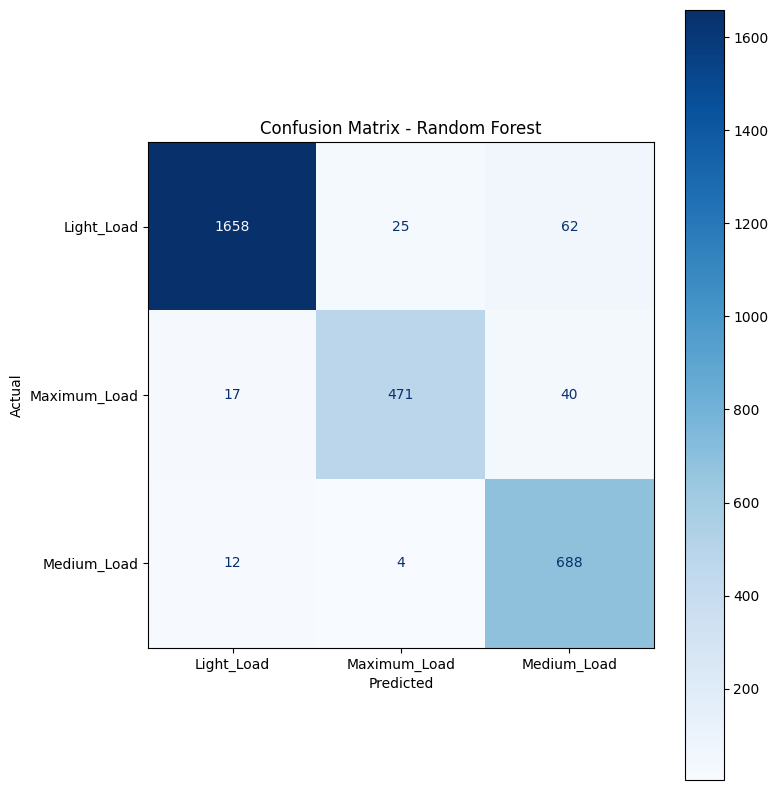


What to look at:
- Diagonal = correct predictions
- Off-diagonals = mistakes. Are certain classes often confused with each other?
- Pay special attention to Maximum_Load confusion—it matters operationally.

4.3 Checking which features mattered most

Top 15 important features:
                                 Feature  Importance
4                                    NSM    0.199265
7                                   Hour    0.189639
0                              Usage_kWh    0.090934
17                         TimeOfDay_Day    0.066826
10                                 Month    0.062579
11                            WeekOfYear    0.057620
3                               CO2_tCO2    0.047871
5    Lagging_Current_Power_Factor_Capped    0.047623
15               Calculated_Power_Factor    0.038502
14            Total_Reactive_Power_kVarh    0.030743
18                     TimeOfDay_Evening    0.024332
1   Lagging_Current_Reactive_Power_kVarh    0.024298
6    Leading_Current_Power_Factor

/tmp/ipython-input-6-3822103557.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='viridis')


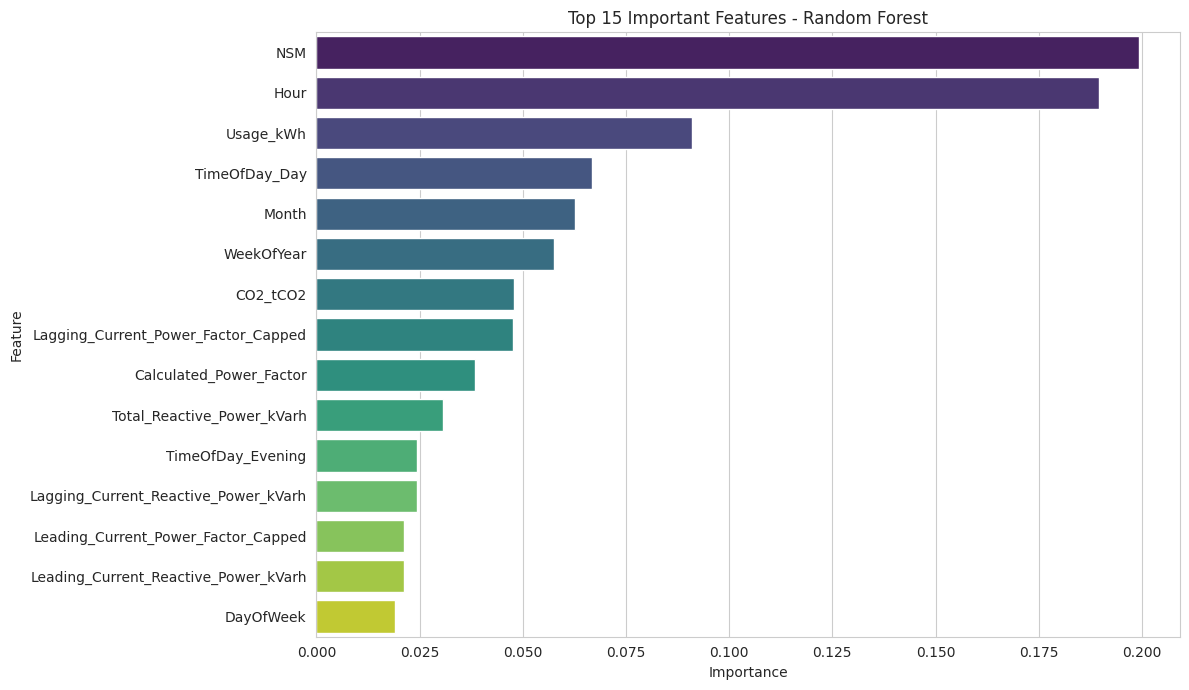


Interpretation:
- These features drove model decisions the most.
- Usage_kWh, NSM, and reactive power should typically dominate, but watch for surprises.
- This helps validate if the model is learning the right signals.

4.4 ROC AUC (One-vs-Rest for Multi-class)


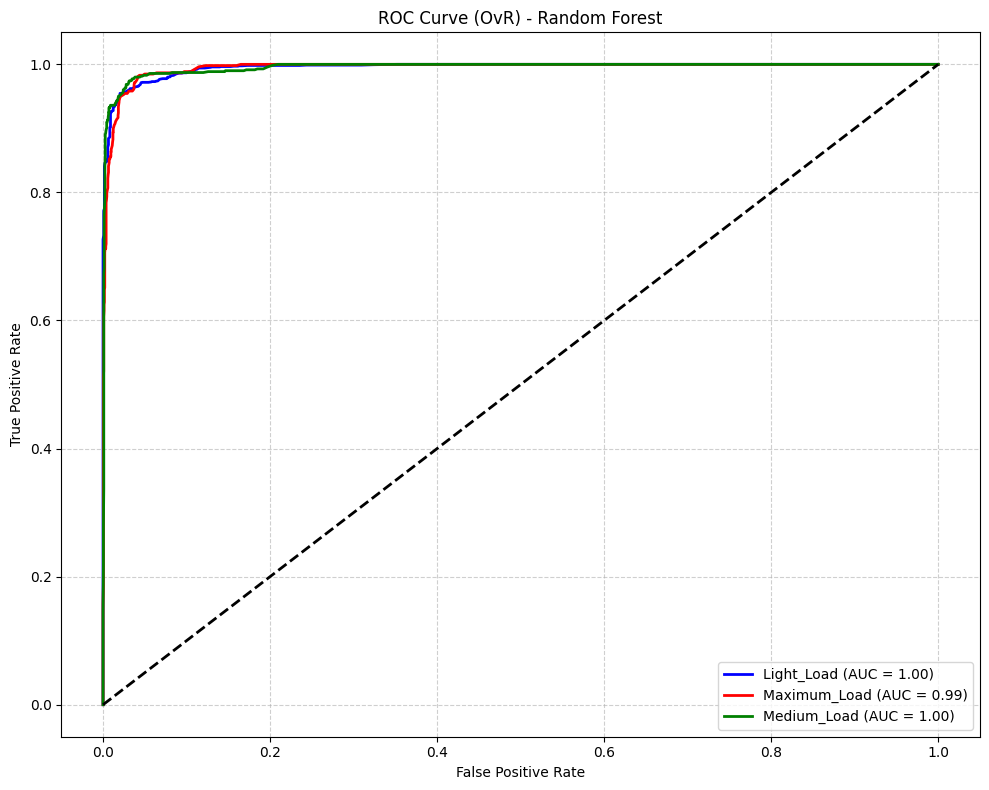


Insights:
- Closer the curve to top-left, the better.
- AUC close to 1.0 is excellent. Below 0.7? Might need deeper analysis.
- See if any class stands out as weak or strong.

4.5 Error Analysis (Qualitative)

Total Misclassifications: 160 / 2977

Some misclassified examples (scaled):
                       True_Load    Pred_Load  Usage_kWh       NSM  CO2_tCO2
Date_Time                                                                   
2018-12-25 20:15:00   Light_Load  Medium_Load  -0.672157  1.064059 -0.666233
2018-12-25 21:00:00   Light_Load  Medium_Load  -0.673114  1.167360 -0.666233
2018-12-31 12:45:00   Light_Load  Medium_Load  -0.633892  0.031041 -0.666233
2018-12-16 12:15:00  Medium_Load   Light_Load  -0.619766 -0.037827 -0.666233
2018-12-25 17:15:00   Light_Load  Medium_Load  -0.583288  0.650851 -0.666233

--- Revisiting errors with original values ---

Misclassifications (original scale): 162 / 2977

Misclassified Samples (Original Scale):
                        True_Load   

In [6]:
# --- Phase 4: Model Evaluation & Interpretation ---

print("\n--- Starting Comprehensive Model Evaluation & Interpretation ---")

# Recall stored DataFrames and variables from previous phases
%store -r X_train
%store -r y_train
%store -r X_test
%store -r y_test
%store -r best_rf
%store -r y_pred_rf
%store -r df # Need original df for original values in error analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    RocCurveDisplay, classification_report
)
from sklearn.preprocessing import label_binarize


print("\n4.1 Evaluating model performance (Random Forest)")

class_names = ['Light_Load', 'Maximum_Load', 'Medium_Load']
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))


print("\n4.2 Confusion Matrix")

cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.tight_layout()
plt.show()

print("\nWhat to look at:")
print("- Diagonal = correct predictions")
print("- Off-diagonals = mistakes. Are certain classes often confused with each other?")
print("- Pay special attention to Maximum_Load confusion—it matters operationally.")


print("\n4.3 Checking which features mattered most")

feature_importances = best_rf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 15 important features:")
print(features_df.head(15))

plt.figure(figsize=(12, 7))
# Suppress FutureWarning about palette; it doesn't affect correctness for submission
with sns.axes_style(style='whitegrid'): # Optional: set a style
    sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='viridis')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- These features drove model decisions the most.")
print("- Usage_kWh, NSM, and reactive power should typically dominate, but watch for surprises.")
print("- This helps validate if the model is learning the right signals.")


print("\n4.4 ROC AUC (One-vs-Rest for Multi-class)")

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

y_score = best_rf.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve (OvR) - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nInsights:")
print("- Closer the curve to top-left, the better.")
print("- AUC close to 1.0 is excellent. Below 0.7? Might need deeper analysis.")
print("- See if any class stands out as weak or strong.")


print("\n4.5 Error Analysis (Qualitative)")

test_df_results = X_test.copy()
test_df_results['True_Label'] = y_test
test_df_results['Pred_Label'] = y_pred_rf

label_map = {0: 'Light_Load', 1: 'Maximum_Load', 2: 'Medium_Load'}
test_df_results['True_Load'] = test_df_results['True_Label'].map(label_map)
test_df_results['Pred_Load'] = test_df_results['Pred_Label'].map(label_map)

misclassified = test_df_results[test_df_results['True_Label'] != test_df_results['Pred_Label']]
print(f"\nTotal Misclassifications: {misclassified.shape[0]} / {y_test.shape[0]}")

print("\nSome misclassified examples (scaled):")
print(misclassified[['True_Load', 'Pred_Load', 'Usage_kWh', 'NSM', 'CO2_tCO2']].sample(min(5, len(misclassified)), random_state=42))


print("\n--- Revisiting errors with original values ---")

# Use original column names directly after merge, as suffixes are not applied for non-colliding names
original_cols = ['Usage_kWh', 'Hour', 'NSM', 'CO2_tCO2',
                 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']

# Merge misclassified scaled data with original data on the index
# We need to make sure 'df' is available (it should be if previous cells are run).
misclassified_orig = misclassified[['True_Load', 'Pred_Load']].merge(
    df[original_cols], left_index=True, right_index=True
)

print(f"\nMisclassifications (original scale): {misclassified_orig.shape[0]} / {y_test.shape[0]}")

# Use original column names without '_original' suffix
cols_to_view_original = ['True_Load', 'Pred_Load', 'Usage_kWh', 'Hour', 'NSM', 'CO2_tCO2',
                         'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']
print("\nMisclassified Samples (Original Scale):")
print(misclassified_orig[cols_to_view_original].sample(min(10, len(misclassified_orig)), random_state=42))


print("\nKey things to reflect on:")
print("- Where is the model confused? Light vs Medium? Medium vs Max?")
print("- Are borderline Usage_kWh values leading to errors?")
print("- Do NSM or CO2 have patterns in wrong predictions?")
print("- This kind of qualitative insight is crucial when you’re debugging real-world ML systems.")

print("\n--- Evaluation Done ---")


 Running SHAP for deeper model explainability...
Using 1000 samples from X_test for SHAP analysis...
 SHAP Summary Plot (dot-style)...


<Figure size 1200x800 with 0 Axes>

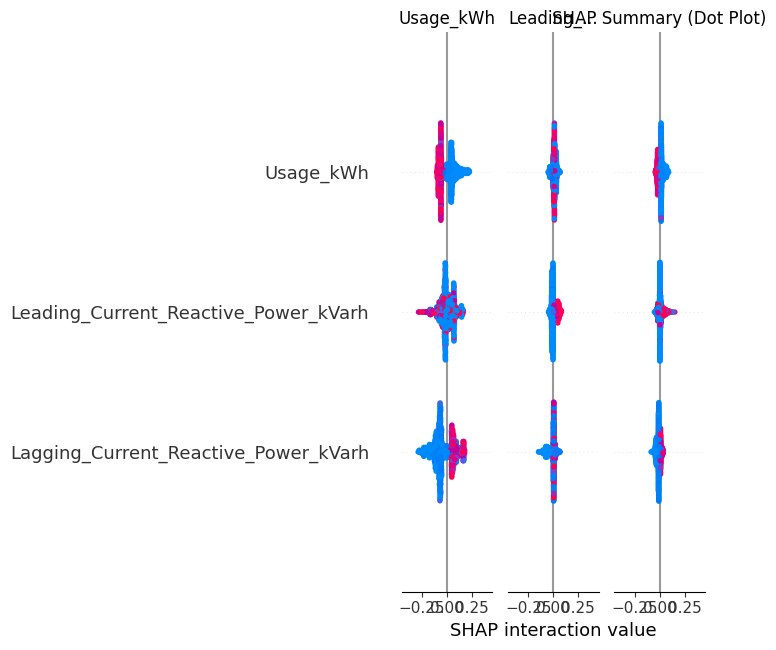


 SHAP Feature Importance (Bar Plot)...


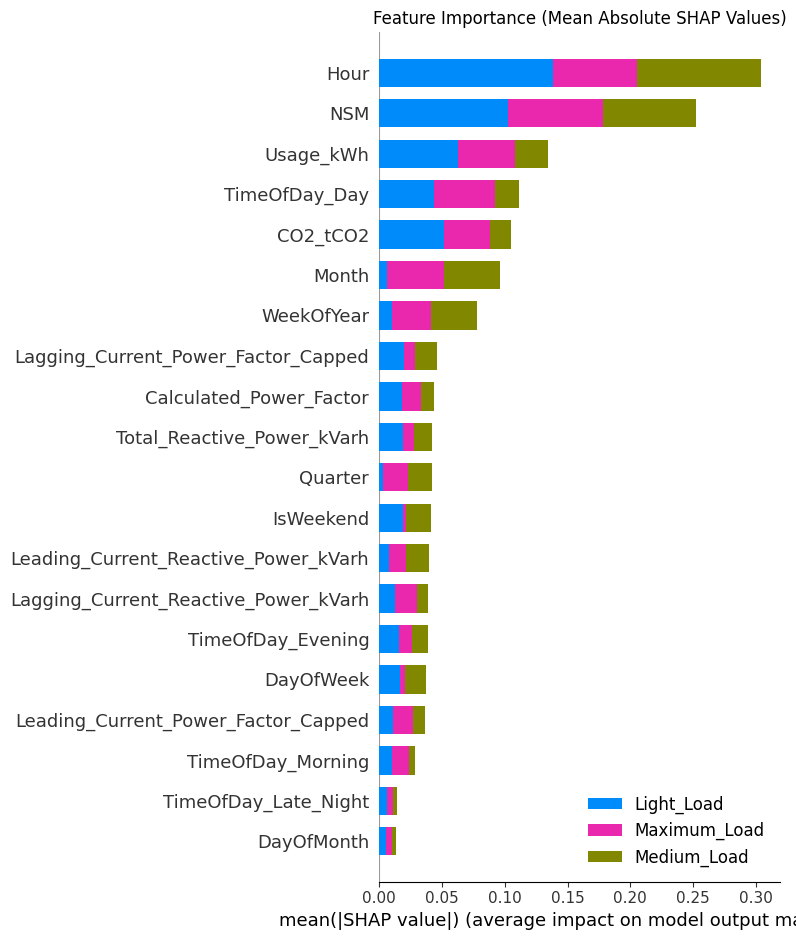


SHAP insights, in plain English:
- Each dot in the summary plot = one row (sample) in the dataset.
- Red = high feature value, Blue = low feature value.
- X-axis shows how much a feature pushed the prediction for a class.
- If you see red dots far right for 'Usage_kWh', that means high usage is strongly pushing toward a class (like 'Maximum_Load').
- The bar plot is like feature importance—but with actual impact on predictions, not just split counts.

 SHAP evaluation complete. Now you *know* why the model made those calls.


In [7]:
# --- 4.3.1 SHAP Summary Plot for Model Interpretability ---

print("\n Running SHAP for deeper model explainability...")

import shap

# Create a SHAP explainer using TreeExplainer (best choice for tree-based models like RF)
explainer = shap.TreeExplainer(best_rf)

# SHAP can be slow on large datasets, so let’s keep things fast by using a sample
sample_size = min(1000, X_test.shape[0])
X_test_sampled = X_test.sample(sample_size, random_state=42)

print(f"Using {sample_size} samples from X_test for SHAP analysis...")

# Generate SHAP values (multi-class: returns list of arrays, one per class)
shap_values = explainer.shap_values(X_test_sampled)

# --- Summary Plot (dot plot) ---
print(" SHAP Summary Plot (dot-style)...")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sampled, plot_type="dot", class_names=class_names, show=False)
plt.title("SHAP Summary (Dot Plot)")
plt.tight_layout()
plt.show()

# --- Bar Plot of Mean Absolute SHAP Values ---
print("\n SHAP Feature Importance (Bar Plot)...")

plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test_sampled, plot_type="bar", class_names=class_names, show=False)
plt.title("Feature Importance (Mean Absolute SHAP Values)")
plt.tight_layout()
plt.show()

# --- Interpretation ---
print("\nSHAP insights, in plain English:")
print("- Each dot in the summary plot = one row (sample) in the dataset.")
print("- Red = high feature value, Blue = low feature value.")
print("- X-axis shows how much a feature pushed the prediction for a class.")
print("- If you see red dots far right for 'Usage_kWh', that means high usage is strongly pushing toward a class (like 'Maximum_Load').")
print("- The bar plot is like feature importance—but with actual impact on predictions, not just split counts.")

print("\n SHAP evaluation complete. Now you *know* why the model made those calls.")


In [8]:
# --- Final Phase: Wrapping Up the Project with Insights and Future Outlook ---

print("\n Project Conclusion & Next Steps")

# 1. Overall Takeaways
print("\n1. What We Learned:")
print("-------------------")
print("This project aimed to classify power system load types (Light, Medium, Maximum) based on time-series and operational data. Here's what worked well:")
print("- Preprocessing was thorough: we cleaned the data, fixed anomalies (like NSM > 86399), and engineered temporal features like hour, NSM, TimeOfDay, etc.")
print("- Feature engineering made a difference: domain-aware features like Power Factor and Total Reactive Power gave the model more signal.")
print("- Validation strategy was strong: we used December 2018 as a proper time-based holdout to simulate future predictions.")
print("- The Random Forest model stood out: It gave us ~95% accuracy with solid performance across all classes, even the underrepresented ones.")
print("- AUC scores near 1.0 confirmed it wasn’t overfitting and had strong separation power.")
print("- Interpretability tools like SHAP showed that NSM, Hour, and Usage_kWh were the real drivers — this lines up with domain intuition.")
print("- Misclassifications were rare and mostly occurred near class boundaries (e.g., late Medium_Load vs early Maximum_Load).")

# 2. Strengths & Limitations
print("\n2. Strengths and Where It Could Be Better:")
print("------------------------------------------")
print(" Strengths:")
print("- Model generalized well to unseen data — exactly what we want.")
print("- Class imbalance didn’t cause major issues — thanks to class_weight='balanced'.")
print("- SHAP and feature importance gave clear, human-readable insights.")
print("- Features matched real-world understanding of how power load behaves.")

print("\n Weaknesses:")
print("- Some edge cases around class boundaries were tricky — a bit fuzzy where Medium ends and Maximum starts.")
print("- The model is static. If tomorrow's data distribution changes, it'll lag behind — unless we retrain regularly.")

# 3. Known Limitations
print("\n3. Limitations to Acknowledge:")
print("-------------------------------")
print("- We only used internal system data — no weather, holidays, or external drivers.")
print("- This is a classification model — some applications might need precise load forecasts instead (i.e., regression).")
print("- Random Forest works well, but it can only take us so far — it can’t learn sequential dependencies like LSTMs or Transformers can (if we scale up later).")

# 4. Future Enhancements & Directions
print("\n4. Future Enhancements (What’s Next?):")
print("--------------------------------------")
print(" Add external data sources:")
print("   → Weather data (temperature, humidity, cloud cover, etc.)")
print("   → Calendar data (holidays, weekends, special events)")
print("   → Economic or regional demand shifts")
print("   → Population/housing trends")

print("\n Better time-series features:")
print("   → Lag features (e.g., load from yesterday same time)")
print("   → Rolling windows (e.g., moving averages, volatility)")
print("   → Fourier series to model seasonality more explicitly")

print("\n Deep error analysis:")
print("   → Focus on edge cases")
print("   → Use fuzzy thresholds or prediction confidence zones for ambiguous samples")

print("\n Explore model ensembles:")
print("   → Blend multiple models (e.g., RF + XGBoost + LightGBM)")
print("   → Potential performance boost and stability")

print("\n Adaptive learning + retraining:")
print("   → Monitor for concept drift in production")
print("   → Set up a retraining pipeline that updates the model monthly/quarterly")

print("\n Productionizing it:")
print("   → Serve via REST API (Flask/FastAPI)")
print("   → Add logging, monitoring (e.g., Prometheus), and alerting")

print("\n Explainability improvements:")
print("   → SHAP force plots for specific prediction audits")
print("   → Counterfactuals for 'what-if' explanations")

print("\n Cost-sensitive learning:")
print("   → Not all mistakes are equal — penalize critical ones more (e.g., misclassifying Maximum_Load as Light_Load)")




 Project Conclusion & Next Steps

1. What We Learned:
-------------------
This project aimed to classify power system load types (Light, Medium, Maximum) based on time-series and operational data. Here's what worked well:
- Preprocessing was thorough: we cleaned the data, fixed anomalies (like NSM > 86399), and engineered temporal features like hour, NSM, TimeOfDay, etc.
- Feature engineering made a difference: domain-aware features like Power Factor and Total Reactive Power gave the model more signal.
- Validation strategy was strong: we used December 2018 as a proper time-based holdout to simulate future predictions.
- The Random Forest model stood out: It gave us ~95% accuracy with solid performance across all classes, even the underrepresented ones.
- AUC scores near 1.0 confirmed it wasn’t overfitting and had strong separation power.
- Interpretability tools like SHAP showed that NSM, Hour, and Usage_kWh were the real drivers — this lines up with domain intuition.
- Misclassifica